In [30]:
# Load the CIFAR-10 dataset
from keras.datasets import cifar10
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

In [31]:
# Print dataset shapes
print('Train Shape:\t', xtrain.shape,ytrain.shape)
print()
print('Test Shape:\t',xtest.shape,ytest.shape)

Train Shape:	 (50000, 32, 32, 3) (50000, 1)

Test Shape:	 (10000, 32, 32, 3) (10000, 1)


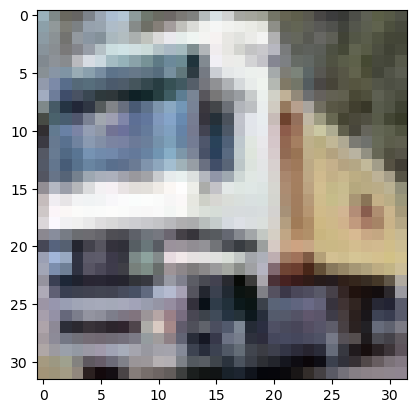

In [32]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[1],cmap='gray')

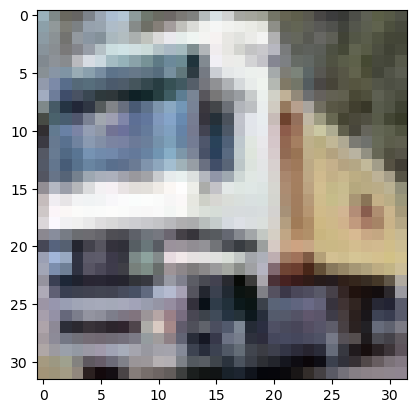

In [33]:
plt.imshow(xtrain[1],cmap='gray_r')

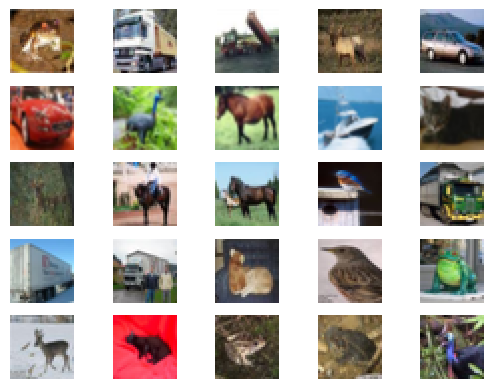

In [34]:
for i in range(25):
    plt.subplot(5,5,1+i)
    plt.axis('off')
    plt.imshow(xtrain[i],cmap='gray_r')
plt.show()

In [35]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten
from keras.layers import Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from keras.optimizers import Adam

In [36]:
# Define the discriminator model
def discriminator(in_shape=(32, 32, 3)):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [37]:
# Define the generator model
def generator(latent_dim):
    model = Sequential()
    n_nodes = 128 * 8 * 8  # Adjusted for CIFAR-10
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 128)))  # Adjusted for CIFAR-10
    
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))  # Adjusted for CIFAR-10
    
    return model

In [38]:
# Define the size of the latent space
latent_dim = 100

In [39]:
# Create the discriminator model
d_model = discriminator()

In [40]:
# Create the generator model
g_model = generator(latent_dim)

In [41]:
# Print model summaries
d_model.summary()
g_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        1792      
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 8, 8, 64)          0         
                                                                 
 dropout_7 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_3 (Flatten)         (None, 4096)             

In [42]:
# Import additional libraries
from numpy import expand_dims, ones, zeros
from numpy.random import rand, randint

In [43]:
# Load real samples from CIFAR-10
def load_real_samples():
    (xtrain, _), (_, _) = cifar10.load_data()
    x = xtrain.astype('float32')
    x = x / 255.0
    return x

In [44]:
# Generate real samples with class labels
def generate_real_samples(dataset, n_samples):
    ix = randint(0, dataset.shape[0], n_samples)
    x = dataset[ix]
    y = ones((n_samples, 1))
    return x, y

In [45]:
# Generate fake samples with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = rand(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    x = generator.predict(x_input)
    y = zeros((n_samples, 1))
    return x, y

In [46]:
# Train the discriminator model
def train_discriminator(d_model, dataset, n_iter=100, n_batch=256):
    half_batch = int(n_batch / 2)

    for i in range(n_iter):
        x_real, y_real = generate_real_samples(dataset, half_batch)
        _, real_acc = d_model.train_on_batch(x_real, y_real)

        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        _, fake_acc = d_model.train_on_batch(x_fake, y_fake)

        print('>%d real=%.0f%% fake=%.0f%%' % (i + 1, real_acc * 100, fake_acc * 100))

In [47]:
# Train the discriminator
dataset = load_real_samples()
train_discriminator(d_model, dataset)

4/4 [==============================] - 0s 49ms/step
>1 real=51% fake=33%
4/4 [==============================] - 0s 48ms/step
>2 real=68% fake=32%
4/4 [==============================] - 0s 47ms/step
>3 real=64% fake=36%
4/4 [==============================] - 0s 46ms/step
>4 real=63% fake=44%
4/4 [==============================] - 0s 46ms/step
>5 real=56% fake=43%
4/4 [==============================] - 0s 46ms/step
>6 real=57% fake=46%
4/4 [==============================] - 0s 47ms/step
>7 real=55% fake=50%
4/4 [==============================] - 0s 52ms/step
>8 real=56% fake=53%
4/4 [==============================] - 0s 52ms/step
>9 real=62% fake=42%
4/4 [==============================] - 0s 52ms/step
>10 real=55% fake=52%
4/4 [==============================] - 0s 56ms/step
>11 real=48% fake=57%
4/4 [==============================] - 0s 53ms/step
>12 real=54% fake=62%
4/4 [==============================] - 0s 51ms/step
>13 real=49% fake=55%
4/4 [==============================] - 0s 55ms/

1/1 [==============================] - 0s 118ms/step


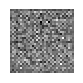

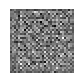

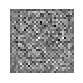

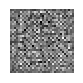

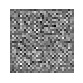

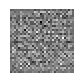

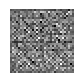

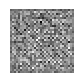

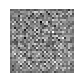

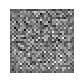

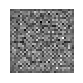

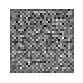

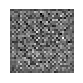

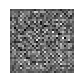

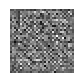

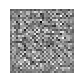

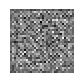

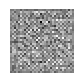

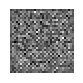

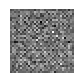

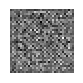

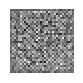

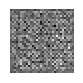

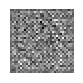

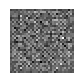

In [52]:
# define the discriminator model
model = generator(latent_dim)

# generate samples
n_samples = 25
x, _ = generate_fake_samples(model, latent_dim, n_samples)

# plot the generated samples
for i in range(n_samples):
    # define subplot
    plt.subplot(5, 5, 1 + i)
    # turn off axis labels
    plt.axis('off')
    # plot single image
    plt.imshow(x[i, :, :, 0], cmap='gray_r')
    # show the figure
    plt.show()